In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
def load(file):
    frame = pd.read_csv(file, parse_dates=["Time"])
    frame = frame.set_index("Time")
    return frame

In [3]:
ircel = load("Ircel_ref.csv")
bme280 = load("BME280_ref.csv")

In [4]:
bme_1h = bme280.resample("1h").mean()

In [5]:
comp = pd.concat([ircel, bme_1h], axis=1)
comp

,41R001,BME280
Time,,
2022-07-01 00:00:00,1014,1012.365556
2022-07-01 01:00:00,1014,1012.614804
2022-07-01 02:00:00,1013,1012.198607
2022-07-01 03:00:00,1014,1012.880501
2022-07-01 04:00:00,1014,1013.022563
...,...,...
2022-07-31 19:00:00,1015,1013.448889
2022-07-31 20:00:00,1015,1013.650418
2022-07-31 21:00:00,1015,1013.746369


In [6]:
credits = "Sources: Irceline, BlueBox\nCredits: J. Landercy"

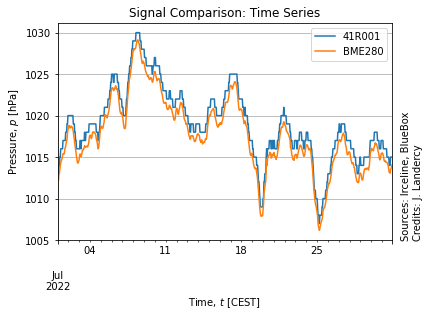

In [15]:
axe = comp.plot()
axe.set_title("Signal Comparison: Time Series")
axe.set_xlabel("Time, $t$ [CEST]")
axe.set_ylabel("Pressure, $p$ [hPa]")
axe.figure.text(0.92, 0.13, credits, rotation=90)
axe.grid()

In [9]:
X = comp["41R001"].values.reshape(-1, 1)
y = comp["BME280"].values

In [35]:
reg = LinearRegression().fit(X, y)
score = reg.score(X, y)
score

0.9954882071233692

In [19]:
reg.coef_

array([0.99102437])

In [21]:
reg.intercept_

7.82684296227751

$\Delta p = \rho g h$

In [23]:
(reg.intercept_*100)/(1.225*9.81)

65.1300668811709

In [24]:
yhat = reg.predict(X)

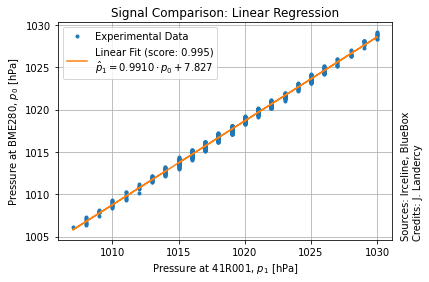

In [39]:
fig, axe = plt.subplots()
axe.plot(X, y, ".", label="Experimental Data")
axe.plot(X, yhat, label="Linear Fit (score: %.3f)\n$\hat{p}_1 = %.4f\cdot p_0 + %.3f$" % (score, reg.coef_[0], reg.intercept_))
axe.set_title("Signal Comparison: Linear Regression")
axe.set_xlabel("Pressure at 41R001, $p_1$ [hPa]")
axe.set_ylabel("Pressure at BME280, $p_0$ [hPa]")
axe.figure.text(0.92, 0.13, credits, rotation=90)
axe.legend()
axe.grid()